# 분류(classification)

지도학습
- 레이블(정답)이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

분류(Classification)
- 지도학습의 대표적 유형
- 학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고 생성된 모델에 새로운 값이 주어졌을 때 미지의 레이블 값을 예측
- 기존 데이터가 어떤 레이블에 속하는지 알고리즘을 통해 패턴을 인지한 뒤 새롭게 단축된 데이터에 대한 레이블을 판별

## 대표적인 분류 알고리즘

- 결정트리(Decision Tree) : 데이터 균일도에 따른 규칙 기반
- 나이브 베이즈(Navie Bayes) : 베이즈 통계와 생성 모델에 기반
- 로지스틱 회기(Logistic Regression) : 독립변수와 종속변수의 선형관계성에 기반
- 서포트 벡터 머신(Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾음
- 최소근접 알고리즘(Nearest Neighbor) : 근접거리 기준
- 신경망(Neural Network) : 심층연결 기반
- 앙상블(Ensemble) : 서로 다른 머신러닝 알고리즘 결합


### 결정트리(Decision Tree)

- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아낸 트리기반의 분류규칙 생성
- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘으로 분류와 회귀문제에 가장많이 활용
- 특정 기준(질문)에 따라서 데이터를 구분
- 가장 쉬운 규칙 표현 방법 : if.else 기반

#### Tree 구조
- 전체적인 모양이 나무를 뒤집어 높은 것과 닮았다고 해서 붙여진 이름
- 결정트리에서 질문이나 네모상자를 노드(Node)라고 함
- 맨 위드 노드(첫 질문)을 Root Node
- 각 질문에 대한 마지막 노드를 Leaf Node
- Decision Node(규칙 노드) : 규칙 조건
- 새로운 규칙 조건마다 Sub Tree 생성

#### 결정트리에서 중요한 이슈

- 데이터 세트의 피처가 결합해 규칙 조건을 만들 때마다 규칙노드가 만들어짐
- 규칙이 많아지면 결정방식이 복잡해지고 과적합(overfitting)발생
    - 즉,depth 가 길어질수록 결정트리 예측성능이 저하될 가능성이 높음


- 적은 결정노드로 높은 예측 정확도
     - 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정노드의
       규칙이 정해져야 함
- 어떻게 트리를 분할 할 것인가가 중요
    - 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 중요
    
#### 가지치기(pruning)

- 과적합 예방
- 특정 노드 밑의 하부트리를 제거해 일반화 성능을 높이는 방법

#### 장점

- 쉽고, 직관적이다.
- 스케일링이나 정규화 등의 가공 영향이 적음

#### 단점

- depth 가 길어질수록 과적합으로 알고리즘 성능 저하
- 트리 크기를 사전에 제한하는 튜닝 필요

#### 성능

- 데이터를 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘 성능을 좌우
- 어떻게 트리를 분할 할 것인가가 중요

## 균일도=불순도(impurity)

- 0에 가까울수록 좋음

### 균일도 측정 방법 

#### 엔트로피를 이용한 정보이득 지수 : 1 - 엔트로피 지수

#### 지니계수


## Dicision Tree 분석 절차

## Early Stopping Rule(정지 규칙)

- 모든 마디가 순수한 상태면 정지
- 의사 결정 트리가 완전히 다 자라기 전에 정지하도록 하여 과적합 방지 및 지나치게 긴 실행 시간 제어
    - 트리의 깊이가 지정한 값 Max Depth에 도달
    - 노드의 크기가 지정한 값 Min Instance Per Node보다 작음
    - 불순도의 감소량이 지정된 값(Min Infomation Gain) 보다 적음


## 결정트리 모델 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩, 학습 테스트 데이터 분리
iris_df = load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_df.data, iris_df.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
### sklearn.tree 모듈은 Graphviz를 이용하기 위한 export_graphviz()함수 제공

#매개변수


In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_df.target_names , \
feature_names = iris_df.feature_names, impurity=True, filled=True)

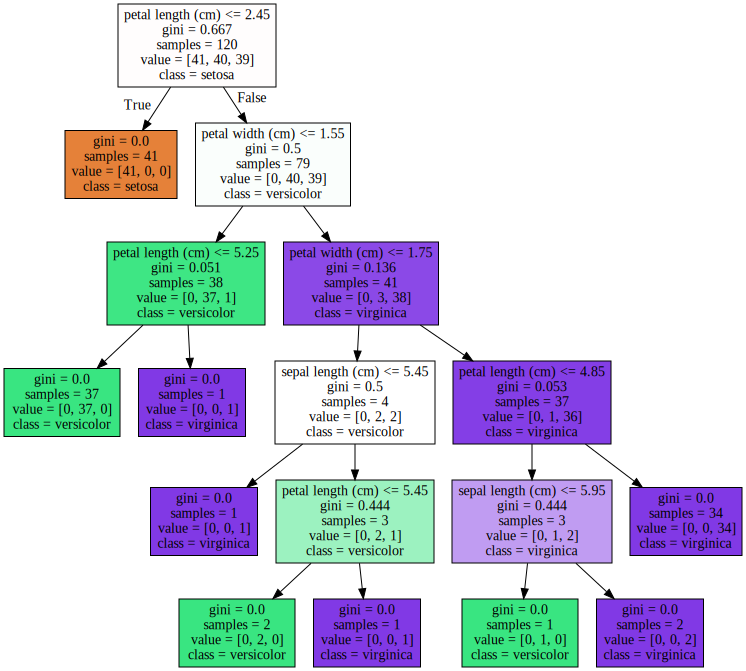

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [5]:
# 생성된 .dot을 .png로 변환해서 저장
from subprocess import call
call(['dot','-Tpnp','tree.dot','-o','dicision-tree.png','-Gdpi=600'])



1

In [12]:
from IPython.display import image
image(filename ='decision-tree.png')

TypeError: 'module' object is not callable

##### 하이퍼 파라미터 튜닝
    - max_depth=4, max_depth3 으로 조정

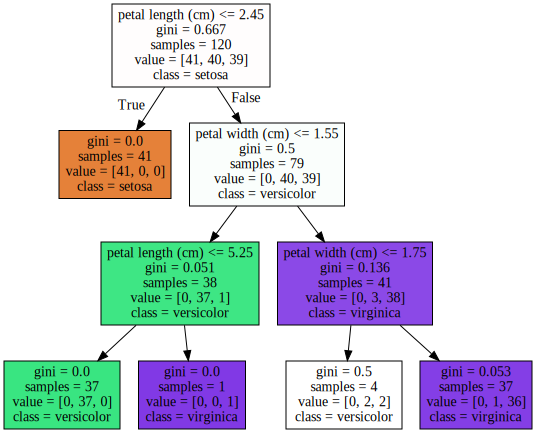

In [7]:
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=156)
dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_df.target_names , \
feature_names = iris_df.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

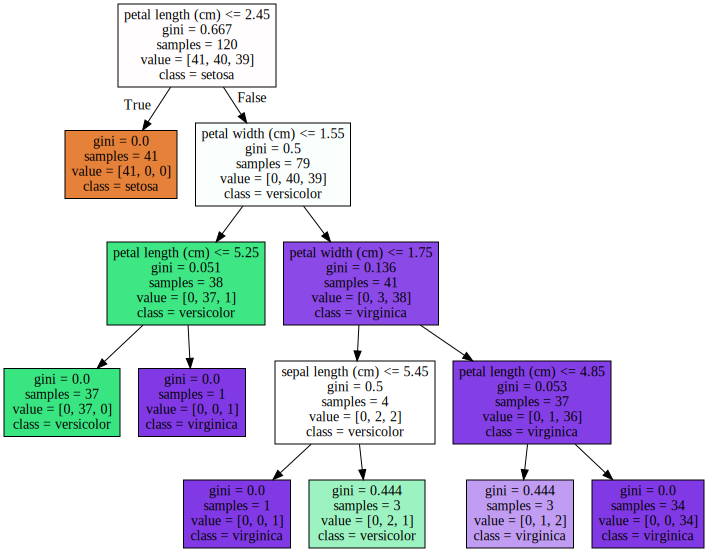

In [8]:
dt_clf = DecisionTreeClassifier(max_depth=4,random_state=156)
dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_df.target_names , \
feature_names = iris_df.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

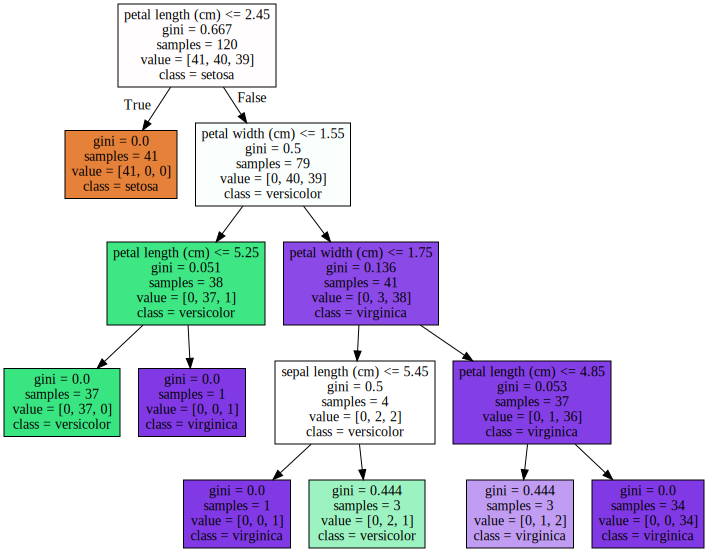

In [9]:
# 하이퍼 파라미터 튜닝
#min_samples_split=4
dt_clf = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_df.target_names , \
feature_names = iris_df.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

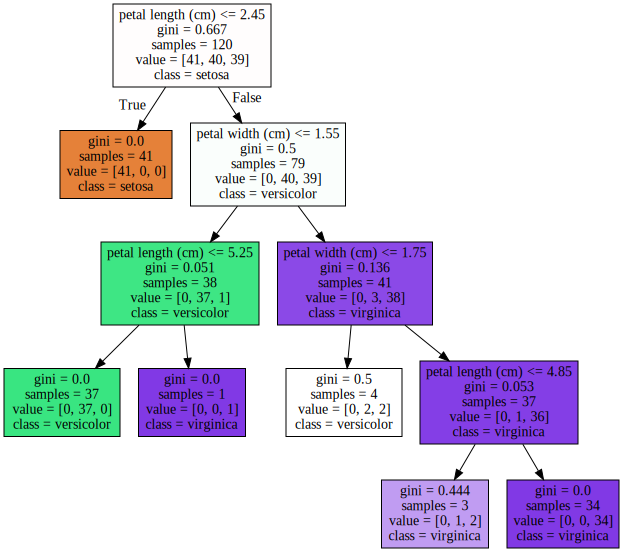

In [10]:
# 하이퍼 파라미터 튜닝
#min_samples_split=5
dt_clf = DecisionTreeClassifier(min_samples_split=5 ,random_state=156)
dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_df.target_names , \
feature_names = iris_df.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

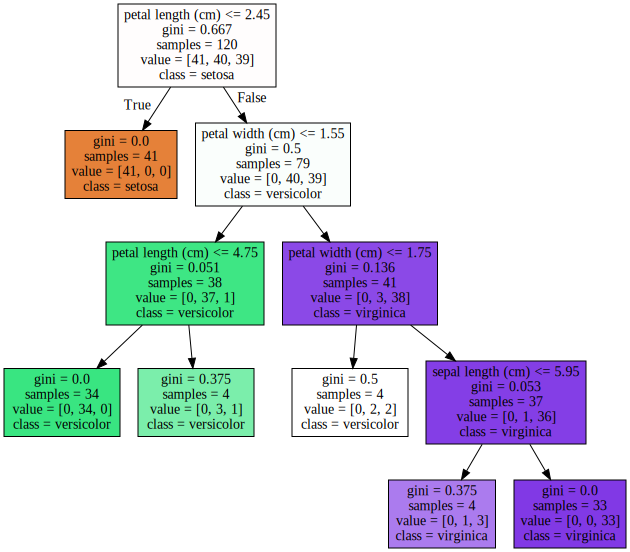

In [11]:
# 하이퍼 파라미터 튜닝
#min_samples_leaf=4
dt_clf = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=156)
dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_df.target_names , \
feature_names = iris_df.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
# 분할을 하기위해 가장 중요도가 높은 변수 확인
import seaborn as sns
import numpy as np

print('iris_df.teature_names:',iris_df.feature_names)

print('feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

iris_df.teature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importance:
[0.006 0.    0.546 0.448]


In [18]:
for name, value in zip(iris_df.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))

sepal length (cm):0.006
sepal width (cm):0.000
petal length (cm):0.546
petal width (cm):0.448


<AxesSubplot:>

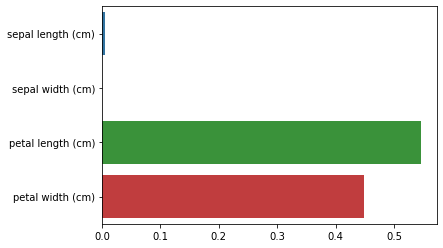

In [20]:
# 중요도 바 플롯으로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_df.feature_names)

#결과
#petal langth 피처 중요도가 가장 높음

##### 결정트리 과적합(Overfitting)

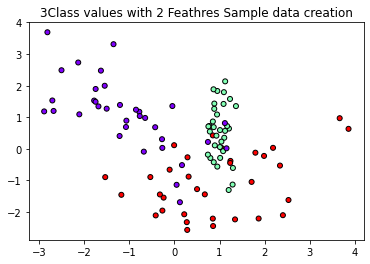

In [29]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3Class values with 2 Feathres Sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0,
                                          n_informative=2, n_classes =3,
                                          n_clusters_per_class=1,random_state=0)

plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow',edgecolor='k')

In [27]:
y_labels,X_features.shape

(array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
        1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
        0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
        0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
        1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0]),
 (100, 2))

##### 생성된 가상 데이터세트 기반으로 싯각화를 통한 데이터 분류 확인

- 결정트리 모델이 어떤 결정 기준으로 분할하면서 데이터를 분류하는지 확인
- visualize_boundary() 함수 생성해서 사용

In [30]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

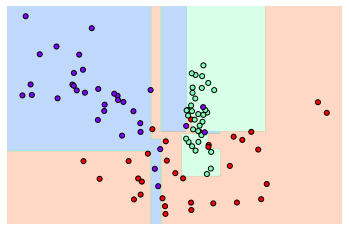

In [35]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
# fit은 따로 안해도 자동으로됨.
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

이상치 포함으로 분류되어 기준경계가 많아지고 복잡함

- min_samples_leaf = 6으로 설정 해 6개 이하의 데이터는 리프노드를 생성할 수 있도록 리프노드 생성 규칙 완화

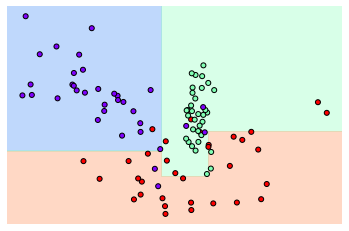

In [34]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6)
visualize_boundary(dt_clf,X_features,y_labels)